In [ ]:
from bs4 import BeautifulSoup
import requests
import re

In [ ]:
url = 'https://www.banki.ru/services/responses/list/'

In [ ]:
root = "https://www.banki.ru"

In [ ]:
page = requests.get(url)
content = page.text
soup = BeautifulSoup(content, "lxml")
rws = soup.find_all('div', {"class" : "la8a5ef73"})

In [ ]:
reviews = []

In [ ]:
for i in range(len(rws) -1):
  urlRw = root + rws[i].find_all("a", {"class": "link-simple"})[0]['href']
  page = requests.get(urlRw)
  content = page.text
  soup = BeautifulSoup(content, "lxml")
  try:
    reviews.append(("".join(p.text for p in [soup.find("div", {"class": "lb1789875"}).find_all("p")]), int(soup.find('div', {"class": "rating-grade"}).text)))
  except:
    reviews.append((soup.find("div", {"class": "lb1789875"}).text, int(soup.find('div', {"class": "rating-grade"}).text)))


In [ ]:
len(reviews)

25

In [ ]:
reviews[1]

('\nРешел сменить премиальное обслуживание с ОТП банка на ДомРФ. где условия намного лучше и проценты выше. Забежал в отделение в г. Казани где мне быстро все оформили объяснили активировали приложение. Я ранее был клентом банка так что все знал и быстро сделали. Спасибо менеджеру Светлане. Договорились что как только выведу деньги со своего банка то приеду к ним. Это удалось сделать в этот же вечер и я позвонил Светлане и меня уже ждали в ДомРФ банке. Пустили на свою парковку и быстро все сделали. Обслуживание на высоте. И вот я снова клиент банка. Заодно и ИИС открыли. Давно хотел все руки не доходили. Мне понравилось такое отношение к клиентам. Молодцы.\xa0\n',
 5)

In [ ]:
from threading import Thread

In [ ]:
def parse(start, end):
  for x in range(start, end):
    url =  f'https://www.banki.ru/services/responses/list/?page={x}&is_countable=on'
    page = requests.get(url)
    content = page.text
    soup = BeautifulSoup(content, "lxml")
    rws = soup.find_all('div', {"class" : "la8a5ef73"})
    for i in range(len(rws) -1):
      urlRw = root + rws[i].find_all("a", {"class": "link-simple"})[0]['href']
      page = requests.get(urlRw)
      content = page.text
      soup = BeautifulSoup(content, "lxml")
      try:
        reviews.append(("".join(p.text for p in [soup.find("div", {"class": "lb1789875"}).find_all("p")]), int(soup.find('div', {"class": "rating-grade"}).text)))
      except:
        reviews.append((soup.find("div", {"class": "lb1789875"}).text, int(soup.find('div', {"class": "rating-grade"}).text)))

In [ ]:
thrds = [Thread(target=parse, args=(2+i*10, 2+ (i+1) * 10)) for i in range(0, 25)]
for thrd in thrds:
  thrd.start()
for thrd in thrds:
  thrd.join()

Exception in thread Thread-40 (parse):
Traceback (most recent call last):
  File "<ipython-input-121-b58703c76569>", line 14, in parse
  File "<ipython-input-121-b58703c76569>", line 14, in <genexpr>
  File "/usr/local/lib/python3.10/dist-packages/bs4/element.py", line 2308, in __getattr__
    raise AttributeError(
AttributeError: ResultSet object has no attribute 'text'. You're probably treating a list of elements like a single element. Did you call find_all() when you meant to call find()?

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-121-b58703c76569>", line 16, in parse
AttributeError: 'NoneType' object has no attribute 'text'


In [ ]:
len(reviews)

6094

In [ ]:
import pickle

In [ ]:
f = open('data', 'wb')
pickle.dump(reviews, f)
f.close()

<function BufferedWriter.close>

In [ ]:
f = open('data', 'rb')
data = pickle.load(f)
f.close()

In [ ]:
len(data)

6094

In [ ]:
data[6000]

('\nДобрый день! Сегодня я расскажу вам как оформил кредитную карту 120 дней без процентов в банке Открытие! Оформлял карту по ссылке друга (была акция при оформлении карты 120 дней процентов можно получить 3000 баллов на дополнительно оформленную дебетовую карту при трате кредитных денег более 3000 рублей)! При оформлении карты по ссылке при получении кредитной карты в отделении банка оператор не уведомил что если вы были уже клиентом банка (ранее приобретал карту дебетовую в банке открытие когда было оформлено ИП) то никаких баллов вы не получите на дебетовую карту! Оформил карту, потратил более 3000 рублей по кредитной карте и стал ждать обещанных баллов! Спустя 2 недели сделал запрос в поддержку о зачислении баллов и там ответили что в этом месяце не будет, ждите в следующем! Спустя месяц снова сделал запрос в службу поддержки и там мне написали что баллов не будет так как уже были клиентом банка! Соответственно, балов я не получил! Потом приходит смс о том что в следующем месяце б

In [ ]:
import numpy as np

In [ ]:
data = np.array(data)
np.shape(data)
y = data[:, 1]

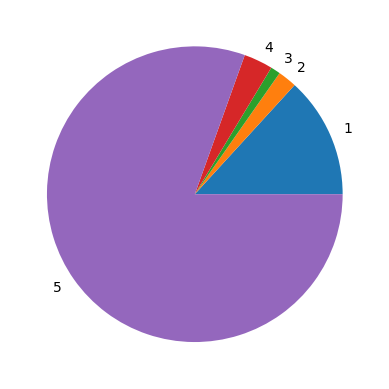

In [ ]:
import matplotlib.pyplot as plt
classes = np.unique(y, return_counts=True)
plt.pie(classes[1], labels=classes[0]);

Дисбаланс классов очень сильный. Было принято решение немного переписать парсер, чтобы не терять качество данных



---



In [ ]:
from bs4 import BeautifulSoup
import requests
import re

In [ ]:
reviews = []
root = "https://www.banki.ru"

In [ ]:
def parse(start, end, rate):
  for x in range(start, end):
    url =  f'https://www.banki.ru/services/responses/list/?page={x}&is_countable=on&rate={rate}'
    page = requests.get(url)
    content = page.text
    soup = BeautifulSoup(content, "lxml")
    rws = soup.find_all('div', {"class" : "la8a5ef73"})
    for i in range(len(rws) -1):
      urlRw = root + rws[i].find_all("a", {"class": "link-simple"})[0]['href']
      page = requests.get(urlRw)
      content = page.text
      soup = BeautifulSoup(content, "lxml")
      try:
        reviews.append(("".join(p.text for p in [soup.find("div", {"class": "lb1789875"}).find_all("p")]), rate))
      except:
        reviews.append((soup.find("div", {"class": "lb1789875"}).text, rate))

In [ ]:
from threading import Thread
thrds = [Thread(target=parse, args=(2+i*4, 2+ (i+1) * 4, r)) for i in range(0, 10) for r in range(1,6)]
for thrd in thrds:
  thrd.start()
for thrd in thrds:
  thrd.join()

In [ ]:
len(reviews)

5000

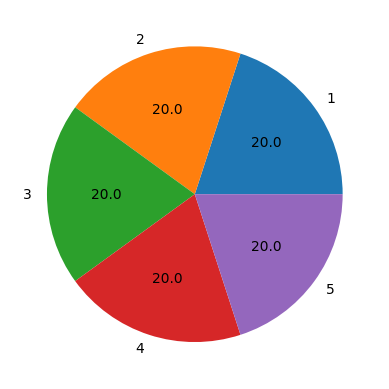

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
classes = np.unique(np.array(reviews)[:, 1], return_counts=True)
plt.pie(classes[1], labels=classes[0], autopct='%.1f');

In [ ]:
import pickle
import numpy as np

In [ ]:
f = open('data_balanced', 'wb')
pickle.dump(reviews, f)
f.close()

In [ ]:
f = open('data_balanced', 'rb')
data = pickle.load(f)
f.close()

In [ ]:
data = np.array(data)

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data[:,0])
y = data[:, 1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=3)

In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
import time

models = {
    'Naive Bayes': GaussianNB(),
    'Logistic regression': LogisticRegression(),
    'Decision tree': DecisionTreeClassifier(),
    'k Nearest Neighbor n=3': KNeighborsClassifier(n_neighbors = 3),
    'k Nearest Neighbor n=5': KNeighborsClassifier(n_neighbors = 5),
    'k Nearest Neighbor n=7': KNeighborsClassifier(n_neighbors = 7),
    'Random forest n=100': RandomForestClassifier(n_estimators= 100),
    'Random forest n=100': RandomForestClassifier(n_estimators= 30),
    'Random forest n=100': RandomForestClassifier(n_estimators= 150),
    'Ridge Classifier': RidgeClassifier()
}

results = pd.DataFrame(columns=['Модель', 'Время обучения', 'Время тестирования', 'Точность'])


for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train.toarray(), y_train)
    training_time = time.time() - start_time

    start_time = time.time()
    y_pred = model.predict(X_test.toarray())
    testing_time = time.time() - start_time

    accuracy = accuracy_score(y_test, y_pred)

    results = results.append({'Модель': model_name, 'Время обучения': training_time,
                              'Время тестирования': testing_time, 'Точность': accuracy}, ignore_index=True)

<ipython-input-11-b4a638c1a5dc>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Модель': model_name, 'Время обучения': training_time,
<ipython-input-11-b4a638c1a5dc>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Модель': model_name, 'Время обучения': training_time,
<ipython-input-11-b4a638c1a5dc>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Модель': model_name, 'Время обучения': training_time,
<ipython-input-11-b4a638c1a5dc>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Модель': model_name, 'Время обучения': trainin

In [ ]:
results

,Модель,Время обучения,Время тестирования,Точность
0,Naive Bayes,3.672990,2.180377,0.3104
1,Logistic regression,94.355759,0.522992,0.5616
2,Decision tree,22.207634,0.384401,0.4024
3,k Nearest Neighbor n=3,1.205078,15.058254,0.3744
4,k Nearest Neighbor n=5,1.204746,15.073625,0.4128
5,k Nearest Neighbor n=7,1.272448,16.127080,0.4232
6,Random forest n=100,41.353189,0.811073,0.5288
7,Ridge Classifier,30.069762,0.515093,0.5480


лучший результат показа логистическая регрессия с accuracy 56%


In [ ]:
from sklearn.metrics import classification_report
model = LogisticRegression()
model.fit(X_train.toarray(), y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.57      0.66      0.61       256
           2       0.41      0.42      0.41       240
           3       0.47      0.41      0.44       254
           4       0.57      0.54      0.55       235
           5       0.75      0.77      0.76       265

    accuracy                           0.56      1250
   macro avg       0.56      0.56      0.56      1250
weighted avg       0.56      0.56      0.56      1250



хуже всего предсказывается оценка 2, а лучше всего - оценка 5

Попробуем улучшить результаты совместив классы

In [ ]:
data[:,1] = np.where(data[:,1] == "1", "Плохо", data[:, 1])
data[:,1] = np.where(data[:,1] == "2", "Плохо", data[:, 1])
data[:,1] = np.where(data[:,1] == "3", "Средне", data[:, 1])
data[:,1] = np.where(data[:,1] == "4", "Средне", data[:, 1])
data[:,1] = np.where(data[:,1] == "5", "Хорошо", data[:, 1])

In [ ]:
data[:, 1]

array(['Плохо', 'Средне', 'Плохо', ..., 'Средне', 'Средне', 'Средне'],
      dtype='<U3603')

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data[:,0])
y = data[:, 1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=3)

In [ ]:
results = pd.DataFrame(columns=['Модель', 'Время обучения', 'Время тестирования', 'Точность'])

for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train.toarray(), y_train)
    training_time = time.time() - start_time

    start_time = time.time()
    y_pred = model.predict(X_test.toarray())
    testing_time = time.time() - start_time

    accuracy = accuracy_score(y_test, y_pred)

    results = results.append({'Модель': model_name, 'Время обучения': training_time,
                              'Время тестирования': testing_time, 'Точность': accuracy}, ignore_index=True)

<ipython-input-45-af27e9d46247>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Модель': model_name, 'Время обучения': training_time,
<ipython-input-45-af27e9d46247>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Модель': model_name, 'Время обучения': training_time,
<ipython-input-45-af27e9d46247>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Модель': model_name, 'Время обучения': training_time,
<ipython-input-45-af27e9d46247>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Модель': model_name, 'Время обучения': trainin

In [ ]:
results

,Модель,Время обучения,Время тестирования,Точность
0,Naive Bayes,3.623148,1.355076,0.4720
1,Logistic regression,71.042552,0.462599,0.6816
2,Decision tree,20.829737,0.371867,0.5608
3,k Nearest Neighbor n=3,1.271555,15.442723,0.5520
4,k Nearest Neighbor n=5,1.276558,15.454262,0.5704
5,k Nearest Neighbor n=7,1.276504,16.296431,0.5888
6,Random forest n=100,40.080613,0.538774,0.6368
7,Ridge Classifier,28.414084,0.434329,0.6704


In [ ]:
from sklearn.metrics import classification_report
model = LogisticRegression()
model.fit(X_train.toarray(), y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Плохо       0.68      0.78      0.73       496
      Средне       0.61      0.60      0.60       489
      Хорошо       0.85      0.65      0.74       265

    accuracy                           0.68      1250
   macro avg       0.71      0.68      0.69      1250
weighted avg       0.69      0.68      0.68      1250



Результаты стали лучше



---



In [ ]:
print("Предположительная оценка: " + model.predict(vectorizer.transform([input()]))[0])

Банк хороший, но есть недочеты
Предположительная оценка: Средне


In [ ]:
print("Предположительная оценка: " + model.predict(vectorizer.transform([input()]))[0])

Все отлично, обслуживанием доволен!
Предположительная оценка: Хорошо


In [ ]:
print("Предположительная оценка: " + model.predict(vectorizer.transform([input()]))[0])

Банк ужасный, ненавижу его
Предположительная оценка: Плохо


А теперь попробуйте сами

In [ ]:
print("Предположительная оценка: " + model.predict(vectorizer.transform([input()]))[0])

нормальный банк
Предположительная оценка: Средне




---



In [ ]:
rating = []

In [ ]:
def parse2(start, end):
  for x in range(start, end):
    url =  f'https://www.banki.ru/services/responses/list/?page={x}&is_countable=on'
    page = requests.get(url)
    content = page.text
    soup = BeautifulSoup(content, "lxml")
    rws = soup.find_all('div', {"class" : "la8a5ef73"})
    for i in range(len(rws) -1):
      rating.append((rws[i].find("img")['alt'], int(rws[i].find("div", {"class": "lb3db10af"}).text)))


In [ ]:
from threading import Thread
thrds = [Thread(target=parse2, args=(2+i*4, 2+ (i+1) * 4)) for i in range(0, 15)]
for thrd in thrds:
  thrd.start()
for thrd in thrds:
  thrd.join()

In [ ]:
df = pd.DataFrame(rating, columns=["Банк", "Оценка"])

## Средняя оценка по банкам

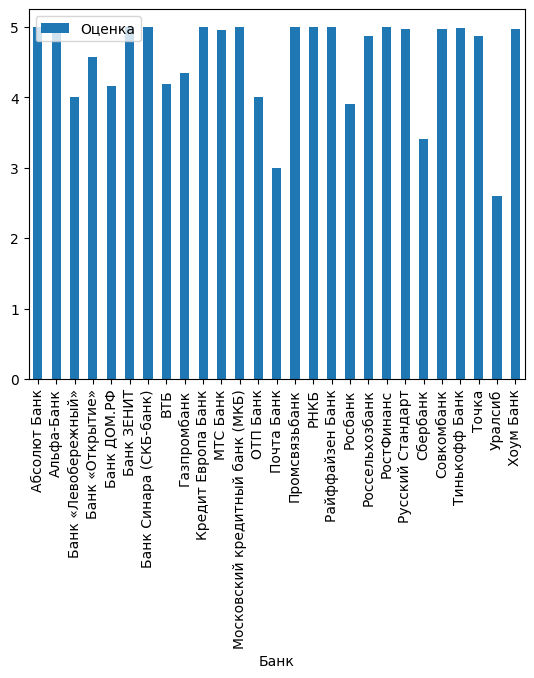

In [ ]:
df.groupby("Банк").mean().plot.bar();

худший банк- Уралсиб

## Количество оценок по банкам

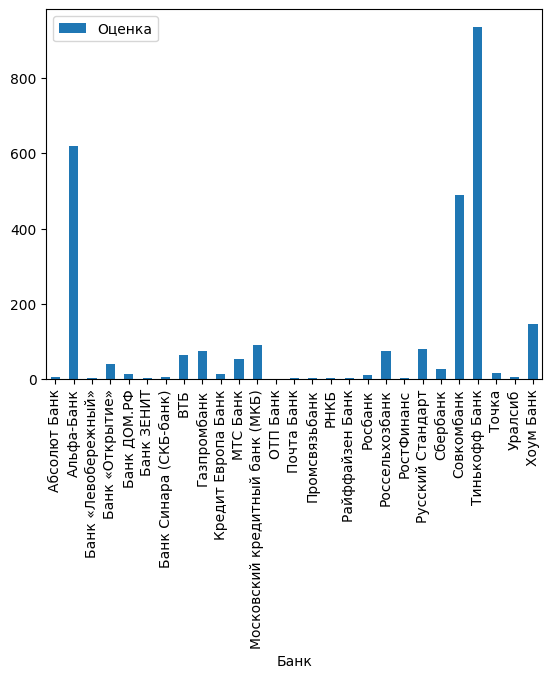

In [ ]:
df.groupby("Банк").count().plot.bar();